In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1: Data Preparation

In [115]:
def interpolate_df(df, start_year, end_year):
    df['Year'] = np.floor(df['Year']).astype(int)
    df = df.groupby('Year').mean().reset_index().set_index('Year')
    df = df.reindex(index = range(start_year, end_year+1))
    df = df.interpolate(method="linear")
    return df

In [116]:
evi = pd.read_csv("/content/drive/MyDrive/ML-Final/final-data/PltEVI.csv",
                  names = ['Year', 'EVI'])
evi = interpolate_df(evi, 1790, 2009).reset_index()
evi.head()

,Year,EVI
0,1790,25.427471
1,1791,26.453490
2,1792,27.356603
3,1793,27.846948
4,1794,28.337294


In [117]:
height = pd.read_csv("/content/drive/MyDrive/ML-Final/final-data/PltHeight.csv",
                     names = ["Year", "height"])
height = interpolate_df(height, 1740, 1969).reset_index()
height.head()


,Year,height
0,1740,172.102516
1,1741,172.110498
2,1742,172.118702
3,1743,172.126907
4,1744,172.140332


In [118]:
hsus = pd.read_csv("/content/drive/MyDrive/ML-Final/final-data/PltHSUS.csv",
                   names = ["Year", "hsus"])
hsus = interpolate_df(hsus, 1790, 1998).reset_index()
hsus

,Year,hsus
0,1790,17.770618
1,1791,17.877591
2,1792,17.984565
3,1793,18.021773
4,1794,18.123514
...,...,...
204,1994,38.367219
205,1995,38.407217
206,1996,38.274663
207,1997,38.149085


In [119]:
immigration = pd.read_csv("/content/drive/MyDrive/ML-Final/final-data/PltImmigration.csv",
                          names = ["Year", "immigration"])
immigration = interpolate_df(immigration, 1815, 2004).reset_index()
immigration.head()

,Year,immigration
0,1815,1.397797
1,1816,1.409010
2,1817,1.424428
3,1818,1.437043
4,1819,1.452460


In [120]:
life = pd.read_csv('/content/drive/MyDrive/ML-Final/final-data/PltLifeExpectancy.csv',
                   names=['Year', 'life_expectancy'])
life = interpolate_df(life, 1740, 1970).reset_index()
life.head()

,Year,life_expectancy
0,1740,52.137586
1,1741,52.186031
2,1742,52.234476
3,1743,52.337902
4,1744,52.382322


In [121]:
polarization = pd.read_csv("/content/drive/MyDrive/ML-Final/final-data/PltPolarization.csv",
                           names = ["Year", "polarization"])
polarization = interpolate_df(polarization, 1790, 2010).reset_index()
polarization.head()

,Year,polarization
0,1790,0.540507
1,1791,0.532692
2,1792,0.544660
3,1793,0.567068
4,1794,0.590043


In [122]:
wage_gdp_ratio = pd.read_csv("/content/drive/MyDrive/ML-Final/final-data/PltWageGDPRatio.csv",
                             names = ["Year", "wage_gdp_ratio"])
wage_gdp_ratio = interpolate_df(wage_gdp_ratio, 1790, 2009).reset_index()
wage_gdp_ratio.head()

,Year,wage_gdp_ratio
0,1790,1.115524
1,1791,1.146261
2,1792,1.128144
3,1793,0.995528
4,1794,0.976730


In [123]:
uspv = pd.read_excel("/content/drive/MyDrive/ML-Final/final-data/USPVdatabase.xlsx")

# Change string values to NaN values
uspv.loc[uspv['fatalities'] == '?'] = 0

# Rename the year column to match other data frames
uspv = uspv.rename(columns={"year" : "Year"})

# Exctract relevant columns; will count fatalities of all types
uspv_yr_fat = uspv[["Year", "fatalities"]].copy()
uspv_yr_fat['fatalities'] = uspv_yr_fat['fatalities'].fillna(0)

# Calculate fatalities for each year
uspv_yr_fat['Year'] = np.floor(uspv_yr_fat['Year'])
uspv_yr_fat = uspv_yr_fat.groupby('Year').sum()

uspv_yr_fat
# Interpolate values for missing years; count no fatalities as 0 rather than linear
fatalities = uspv_yr_fat.reindex(range(1782, 2010+1)).fillna(0).reset_index()


fatalities.head()

,Year,fatalities
0,1782,1.0
1,1783,0.0
2,1784,9.0
3,1785,0.0
4,1786,0.0


Load in and clean the population data

In [124]:
# Scape the data
population = pd.read_html("https://courses.lumenlearning.com/suny-ushistory2os2xmaster/chapter/united-states-population-chart/#footnote1")
population = population[0]

# Correct the columns of the data
census_year = pd.concat([population['Census Year'], population['Census Year.1']], ignore_index=True)
population_count = pd.concat([population['Population'], population['Population.1']], ignore_index=True)
population_cols = pd.concat([census_year, population_count], axis=1).dropna()

# Rename the columns
population = population_cols.rename(columns={0:"Year",
                                             1:"Population"})

# Convert the Year column to integer and set as index
population['Year'] = population['Year'].astype(int)
population = population.set_index('Year')

population.head()




,Population
Year,
1610,350.0
1620,2302.0
1630,4646.0
1640,26634.0
1650,50368.0


In [125]:
# Merge the fatalaties and populations dfs
fatalities = fatalities.merge(population, left_index=True, right_index=True, how='left')

# Reset the index so we can call on the Year column later to fill population NaN
fatalities = fatalities.reset_index()
fatalities.head(10)

,index,Year,fatalities,Population
0,0,1782,1.0,NaN
1,1,1783,0.0,NaN
2,2,1784,9.0,NaN
3,3,1785,0.0,NaN
4,4,1786,0.0,NaN
5,5,1787,20.0,NaN
6,6,1788,3.0,NaN
7,7,1789,0.0,NaN
8,8,1790,0.0,NaN
9,9,1791,1.0,NaN


In [126]:
# Fill in Population Nan values with relevant decade population
decade_start = 1780
decade_end = 1789
num_decades = 23

for d in range(num_decades):
    fatalities.loc[(fatalities['Year'] >= decade_start) &
                   (fatalities['Year'] <= decade_end), 'Population'] = population.loc[decade_start, 'Population']
    decade_start += 10
    decade_end += 10

fatalities

,index,Year,fatalities,Population
0,0,1782,1.0,2780369.0
1,1,1783,0.0,2780369.0
2,2,1784,9.0,2780369.0
3,3,1785,0.0,2780369.0
4,4,1786,0.0,2780369.0
...,...,...,...,...
224,224,2006,23.0,281421906.0
225,225,2007,28.0,281421906.0
226,226,2008,62.0,281421906.0
227,227,2009,152.0,281421906.0


Calculate the instability index

In [127]:
fatalities['fatalities_five_wind'] = fatalities['fatalities'].rolling(window=5, center=True, min_periods=1).sum()
fatalities.loc[fatalities['Year'] > 1900]


,index,Year,fatalities,Population,fatalities_five_wind
119,119,1901,18.0,76212168.0,133.0
120,120,1902,8.0,76212168.0,137.0
121,121,1903,29.0,76212168.0,91.0
122,122,1904,27.0,76212168.0,138.0
123,123,1905,9.0,76212168.0,143.0
...,...,...,...,...,...
224,224,2006,23.0,281421906.0,165.0
225,225,2007,28.0,281421906.0,303.0
226,226,2008,62.0,281421906.0,315.0
227,227,2009,152.0,281421906.0,292.0


None

In [128]:
fatalities.query("fatalities_five_wind == 0")

,index,Year,fatalities,Population,fatalities_five_wind
27,27,1809,0.0,5308483.0,0.0
34,34,1816,0.0,7239881.0,0.0
40,40,1822,0.0,9638453.0,0.0


In [129]:
fatalities['instability'] = np.log(fatalities['fatalities_five_wind'] / (fatalities['Population'] / 1000000))

In [130]:
instability = fatalities.drop(columns=['fatalities', 'fatalities_five_wind'])
instability

,index,Year,Population,instability
0,0,1782,2780369.0,1.280001
1,1,1783,2780369.0,1.280001
2,2,1784,2780369.0,1.280001
3,3,1785,2780369.0,2.344712
4,4,1786,2780369.0,2.443152
...,...,...,...,...
224,224,2006,281421906.0,-0.533910
225,225,2007,281421906.0,0.073878
226,226,2008,281421906.0,0.112718
227,227,2009,281421906.0,0.036899


Check for any -inf (log(0)) values in instability and interpolate them

In [131]:
instability['instability'] = instability['instability'].replace(-np.inf, np.NaN)
instability['instability'] = instability['instability'].interpolate(method='linear')

In [132]:
instability.query("instability == -inf")

,index,Year,Population,instability


Merge all the data

In [133]:
data_frames = [instability, evi, height, hsus, immigration, polarization, wage_gdp_ratio]


merged_data = data_frames[0]

for df in data_frames[1:]:
    merged_data = pd.merge(merged_data, df, on='Year', how='outer')

display = merged_data.loc[(merged_data['Year'] >= 1901) &
                              (merged_data['Year'] <= 1910)]
display = display.drop('index', axis=1)
display

,Year,Population,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio
119,1901,76212168.0,0.556828,1474.485794,170.327901,30.705119,13.799276,0.845472,0.651275
120,1902,76212168.0,0.586460,1566.712894,170.500641,31.292457,13.896828,0.860217,0.645180
121,1903,76212168.0,0.177338,1667.193907,170.672486,31.879503,13.987653,0.868912,0.639086
122,1904,76212168.0,0.593733,1739.168108,170.887293,32.216537,14.093615,0.877794,0.627711
123,1905,76212168.0,0.629323,1850.340634,171.104785,32.525996,14.199577,0.890111,0.606085
124,1906,76212168.0,0.709904,1965.170701,171.330332,33.112025,14.340019,0.898414,0.596688
125,1907,76212168.0,0.670425,2051.363070,171.562144,33.724216,14.483824,0.891646,0.607063
126,1908,76212168.0,1.142942,2182.491979,171.782321,34.027114,14.576331,0.882256,0.610940
127,1909,76212168.0,0.959784,2325.601346,172.015625,34.346872,14.673883,0.873668,0.608747
128,1910,92228496.0,0.943791,2419.599594,172.188067,34.935227,14.620061,0.860964,0.602996


In [134]:
display = display.reset_index()
display

,index,Year,Population,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio
0,119,1901,76212168.0,0.556828,1474.485794,170.327901,30.705119,13.799276,0.845472,0.651275
1,120,1902,76212168.0,0.586460,1566.712894,170.500641,31.292457,13.896828,0.860217,0.645180
2,121,1903,76212168.0,0.177338,1667.193907,170.672486,31.879503,13.987653,0.868912,0.639086
3,122,1904,76212168.0,0.593733,1739.168108,170.887293,32.216537,14.093615,0.877794,0.627711
4,123,1905,76212168.0,0.629323,1850.340634,171.104785,32.525996,14.199577,0.890111,0.606085
5,124,1906,76212168.0,0.709904,1965.170701,171.330332,33.112025,14.340019,0.898414,0.596688
6,125,1907,76212168.0,0.670425,2051.363070,171.562144,33.724216,14.483824,0.891646,0.607063
7,126,1908,76212168.0,1.142942,2182.491979,171.782321,34.027114,14.576331,0.882256,0.610940
8,127,1909,76212168.0,0.959784,2325.601346,172.015625,34.346872,14.673883,0.873668,0.608747
9,128,1910,92228496.0,0.943791,2419.599594,172.188067,34.935227,14.620061,0.860964,0.602996


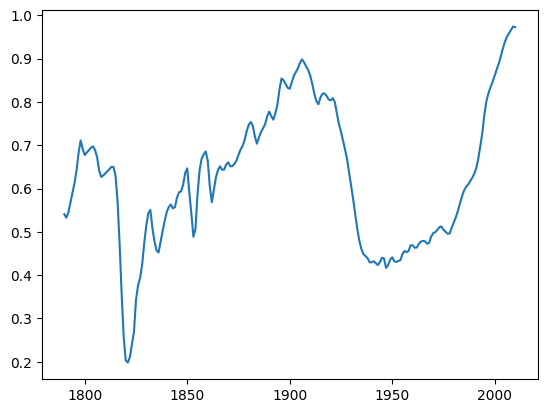

In [135]:
plt.plot(merged_data['Year'], merged_data['polarization'])

# Question 2: EDA

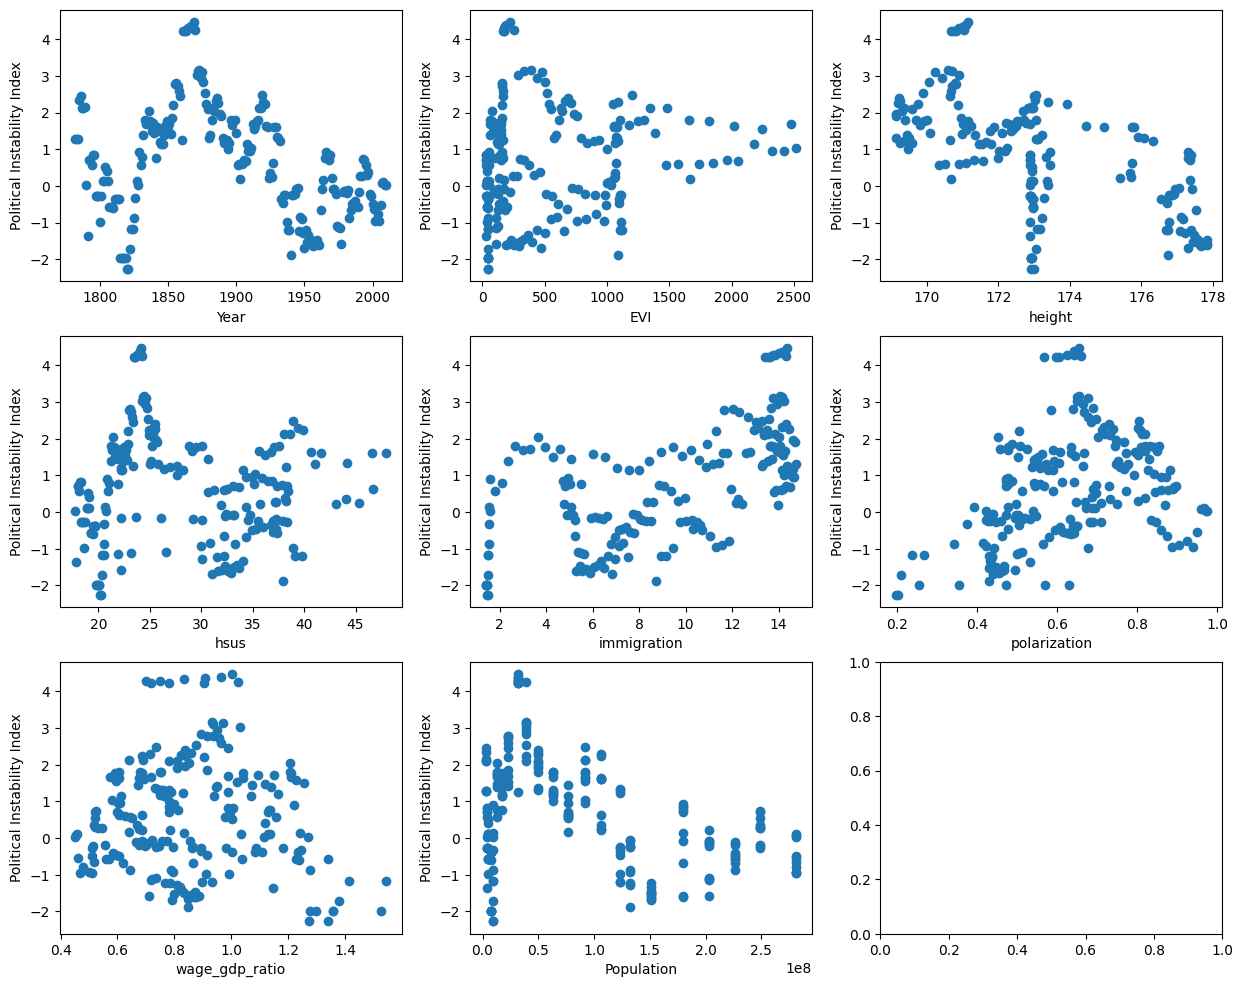

In [136]:
predictors = ['Year', 'EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio', 'Population']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, predictor in enumerate(predictors):
  ax.flat[i].scatter(merged_data[predictor], merged_data['instability'])
  ax.flat[i].set_ylabel('Political Instability Index')
  ax.flat[i].set_xlabel(predictor)

plt.show()

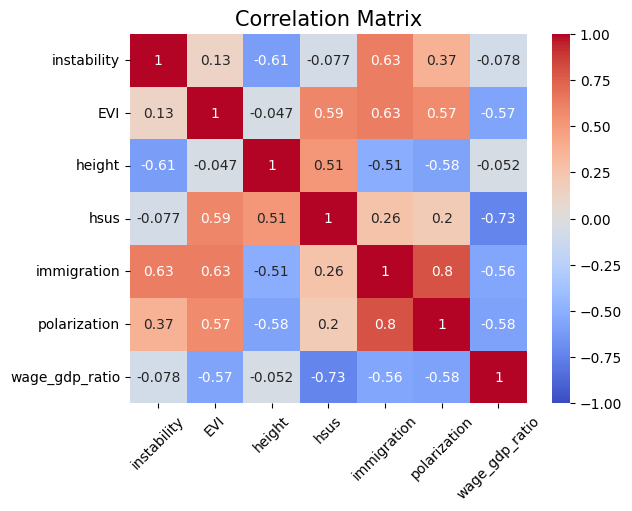

In [138]:
correlation_matrix = merged_data.drop(['index', 'Population', 'Year'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.title('Correlation Matrix', size=15)
plt.show()

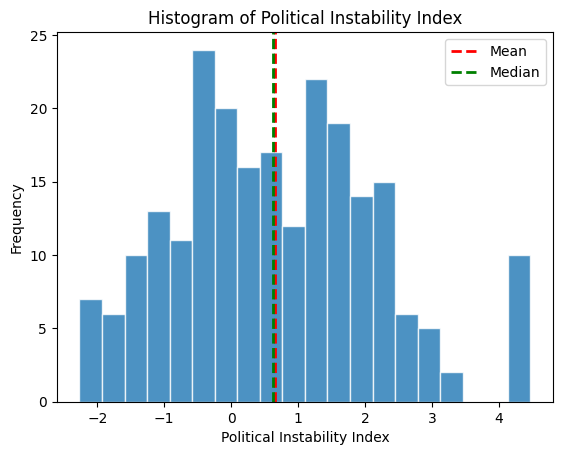

Instability Mean: 0.6550110132477031
Instability Median: 0.6293234952762353


In [27]:
plt.hist(merged_data['instability'], edgecolor='white', bins=20, alpha=0.8)
plt.axvline(merged_data['instability'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(merged_data['instability'].median(), color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Political Instability Index')
plt.ylabel('Frequency')
plt.legend(['Mean', 'Median'])
plt.title('Histogram of Political Instability Index')
plt.show()

print(f"Instability Mean: {merged_data['instability'].mean()}")
print(f"Instability Median: {merged_data['instability'].median()}")

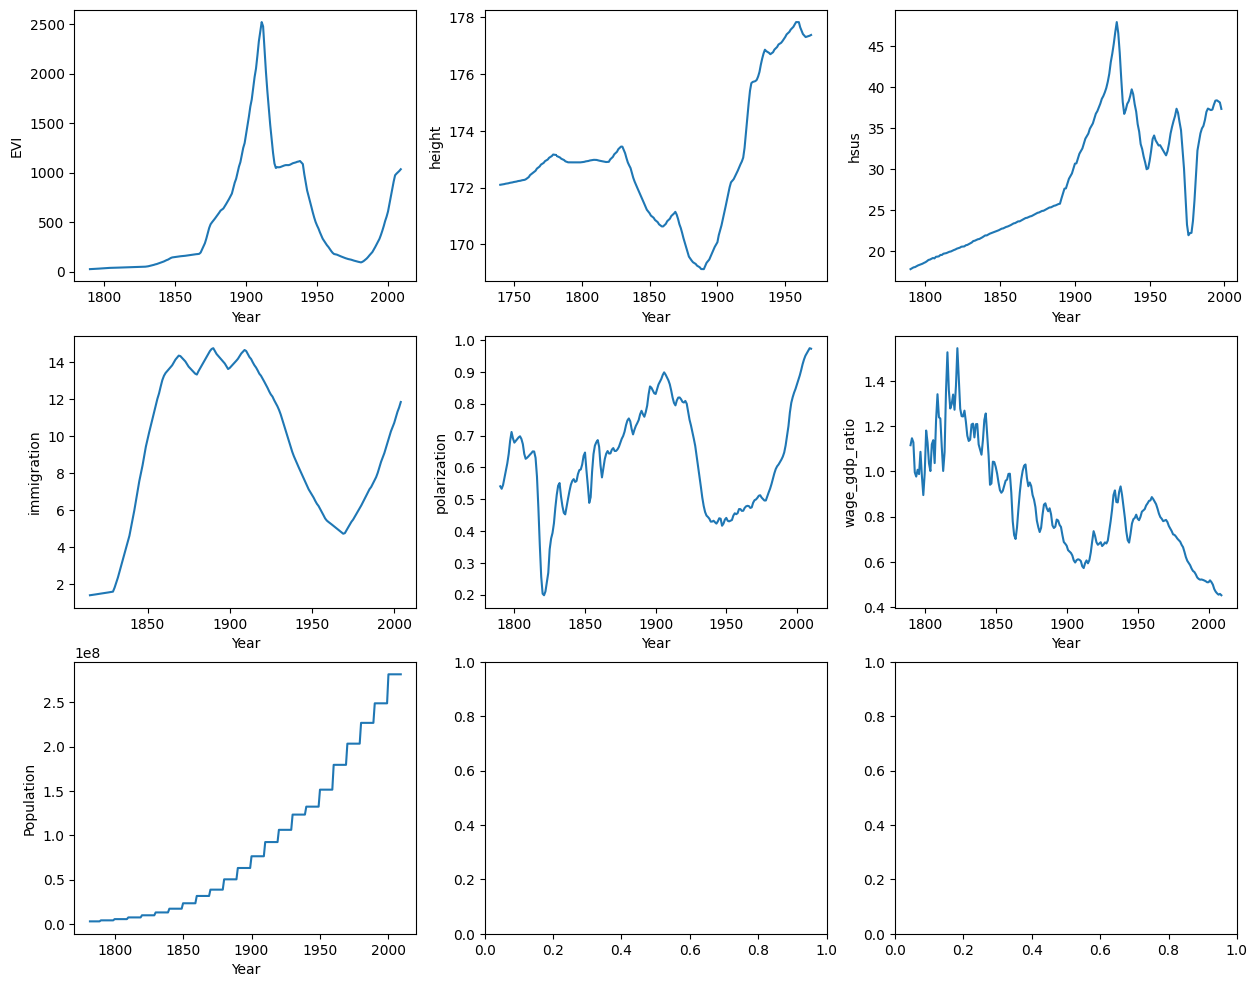

In [28]:
features_vs_time = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio', 'Population']

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, predictor in enumerate(features_vs_time):
  ax.flat[i].plot(merged_data['Year'], merged_data[predictor])
  ax.flat[i].set_ylabel(f"{predictor}")
  ax.flat[i].set_xlabel('Year')

plt.show()



# Question 3: Find best regressor!!

## Standardize the relevant columns

Drop the missing values before standardizing. Many variables change drastically over time based on the time plots, so it wouldnt make sense to impute NaN values with mean for very early years as it might be much larger/smaller than reality. Remm=ember each observation is a year.

In [29]:
merged_data = merged_data.dropna()
merged_data = merged_data.drop(columns=['index', 'Population'])
merged_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio
33,1815,-1.979605,42.730802,172.932432,19.812750,1.397797,0.630059,1.356598
34,1816,-1.979605,43.050512,172.924227,19.894974,1.409010,0.570889,1.526536
35,1817,-1.979605,43.541200,172.916023,19.931601,1.424428,0.472200,1.358445
36,1818,-1.979605,44.180841,172.904089,20.024040,1.437043,0.356102,1.277825
37,1819,-1.979605,44.758390,172.907819,20.106363,1.452460,0.256378,1.297731


Standardize

In [30]:
from sklearn.preprocessing import StandardScaler

# Select all predicted features
features = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']

# Rescale the features and set columns to rescaled features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data[features])


merged_data.loc[:, features] = scaled_features

merged_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502


## Model 1: Ridge Regression

We will use grid seach to find the best parameters and use $R^2$ value as our evaluation metric.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Split the data into training and testing sets
predictors = merged_data.drop(['Year', 'instability'], axis=1)
outcome = merged_data['instability']

X_train, X_test, y_train, y_test = train_test_split(predictors,
                                                    outcome,
                                                    test_size=0.3,
                                                    random_state=67)

# Create the model instance
ridge_model = Ridge(random_state=67)

# Define parameter grid to test
ridge_param_grid = {
    "alpha": 10.0 ** np.arange(-5, 6),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

# Perform grid search with cross validation
ridge_grid_search = GridSearchCV(ridge_model, ridge_param_grid, cv=10, scoring='r2')
ridge_grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
ridge_best_params = ridge_grid_search.best_params_
print(f"Ridge Best Parameters: {ridge_best_params}")

# Train the model with the best parameters on the training data
best_ridge_model = ridge_grid_search.best_estimator_
best_ridge_model.fit(X_train, y_train)

# Make predictions on the test data
ridge_predictions = best_ridge_model.predict(X_test)

# Evaluate the model recall
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f"Ridge R^2: {ridge_r2}")

Ridge Best Parameters: {'alpha': 1.0, 'solver': 'saga'}
Ridge R^2: 0.6449519994267628


In [32]:
best_ridge_model.coef_

array([-0.94826627, -0.52299974,  0.28739083,  0.74917245,  0.6001915 ,
        0.11625167])

In [33]:
best_ridge_model.feature_names_in_

array(['EVI', 'height', 'hsus', 'immigration', 'polarization',
       'wage_gdp_ratio'], dtype=object)

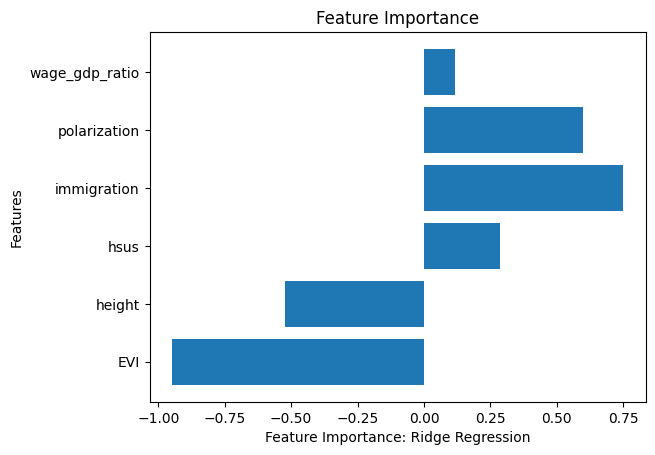

In [34]:
plt.barh(best_ridge_model.feature_names_in_, best_ridge_model.coef_)
plt.xlabel('Feature Importance: Ridge Regression')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## Model 2: Lasso Regression

In [35]:
from sklearn.linear_model import Lasso

# Create the model instance
lasso_model = Lasso(random_state=67)

# Define parameter grid to test
lasso_param_grid = {
    "alpha": 10.0 ** np.arange(-5, 6),
    'selection': ['cyclic', 'random']}

# Perform grid search with cross validation
lasso_grid_search = GridSearchCV(lasso_model, lasso_param_grid, cv=10, scoring='recall')
lasso_grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
lasso_best_params = lasso_grid_search.best_params_
print(f"Lasso Best Parameters: {lasso_best_params}")

# Train the model with the best parameters on the training data
best_lasso_model = lasso_grid_search.best_estimator_
best_lasso_model.fit(X_train, y_train)

# Make predictions on the test data
lasso_predictions = best_lasso_model.predict(X_test)

# Evaluate the model recall
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f"Lasso R^2: {lasso_r2}")

Lasso Best Parameters: {'alpha': 1e-05, 'selection': 'cyclic'}
Lasso R^2: 0.644753061838832


In [36]:
best_lasso_model.coef_

array([-0.9869654 , -0.54436996,  0.33582374,  0.75805301,  0.61376546,
        0.13421219])

In [37]:
best_lasso_model.feature_names_in_

array(['EVI', 'height', 'hsus', 'immigration', 'polarization',
       'wage_gdp_ratio'], dtype=object)

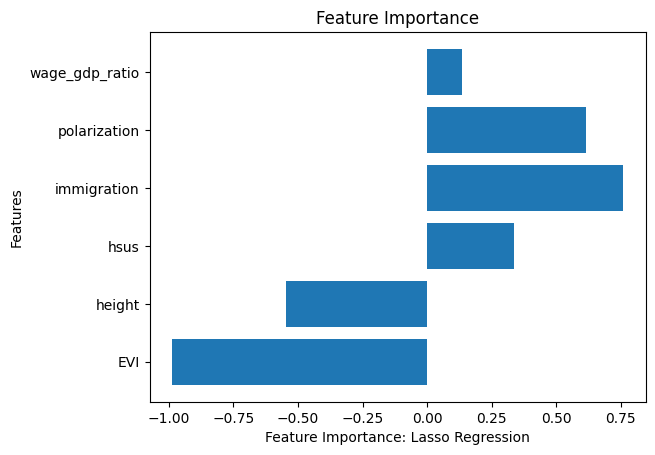

In [38]:
plt.barh(best_lasso_model.feature_names_in_, best_lasso_model.coef_)
plt.xlabel('Feature Importance: Lasso Regression')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Some of the feature values did not converge to 0. Try manually changing alpha parameter to have stronger regularization (higher alpha)

In [39]:
lasso2 = Lasso(alpha=0.1, selection='cyclic', random_state=67)
lasso2.fit(X_train, y_train)
lasso2_predictions = lasso2.predict(X_test)
lasso2_r2 = r2_score(y_test, lasso2_predictions)
print(f"Lasso R^2: {lasso2_r2}")
print(f"Lasso Coeficients: {lasso2.coef_}")
print(f"Lasso Coeficient Labels: {lasso2.feature_names_in_}")

Lasso R^2: 0.62271465698996
Lasso Coeficients: [-0.55541211 -0.44299005 -0.          0.65445272  0.34412509  0.        ]
Lasso Coeficient Labels: ['EVI' 'height' 'hsus' 'immigration' 'polarization' 'wage_gdp_ratio']


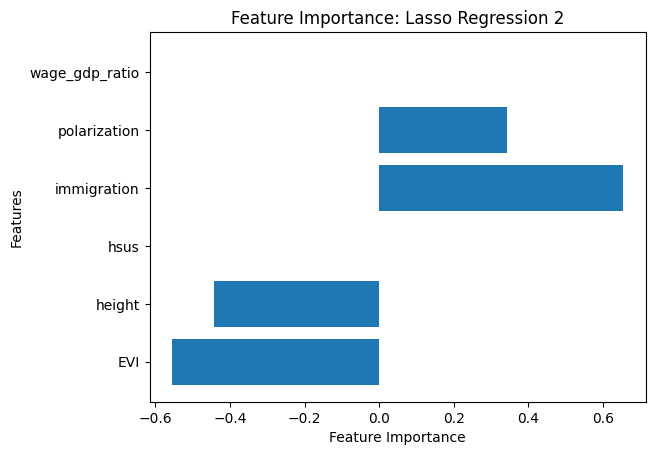

In [40]:
plt.barh(lasso2.feature_names_in_, lasso2.coef_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance: Lasso Regression 2')
plt.show()

The first lasso model has a higher $R^2$ value, so we keep that model.

## Model 3: Logistic Regression

For classification, we will use logistic regression because it can indicate feature importance similar to linear regression. Naive bayes does not give insight into feature importance, so we will use Logistic Regression and Decision Trees/ random forests.

Create labels for high and low political instability for binary classification that that suits logistic regression.

In [41]:
unstable_threshold = np.quantile(merged_data['instability'], 0.5)
print(unstable_threshold)

class_data = merged_data.copy()

class_data['instability_class'] = merged_data['instability'].apply(lambda x: 1 if x >= unstable_threshold else 0)
class_data.head()


1.2370838533397104


,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0


Train and fit the model

In [42]:
import statsmodels.api as sm
from sklearn.metrics import recall_score, f1_score, precision_score


logit_predictors = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']
logit_outcome = ['instability_class']

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(class_data[logit_predictors],
                                                    class_data[logit_outcome],
                                                    test_size=0.3,
                                                    random_state=67)
# Create the model
model = sm.Logit(y_train, X_train, random_state=67)

# Fit the best model
log_reg = model.fit()
print(log_reg.summary())

# Collect probabilities of instability
predictions = log_reg.predict(X_test)


# Convert probabilities to binary values
predictions = (predictions >= 0.5).astype(int)

# Calculare recall score
logit_recall = recall_score(y_test, predictions)
print(f"Logistic Regression Recall: {logit_recall}")

logit2_precision = precision_score(y_test, predictions)
print(f"Logistic Regression Precision: {logit2_precision}")

logit_f1 = f1_score(y_test, predictions)
print(f"Logistic Regression F1: {logit_f1}")


Optimization terminated successfully.
         Current function value: 0.365534
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      instability_class   No. Observations:                  108
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            5
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.4721
Time:                        23:54:16   Log-Likelihood:                -39.478
converged:                       True   LL-Null:                       -74.786
Covariance Type:            nonrobust   LLR p-value:                 7.627e-14
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
EVI               -1.8477      0.531     -3.477      0.001      -2.889      -0.806
height           

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


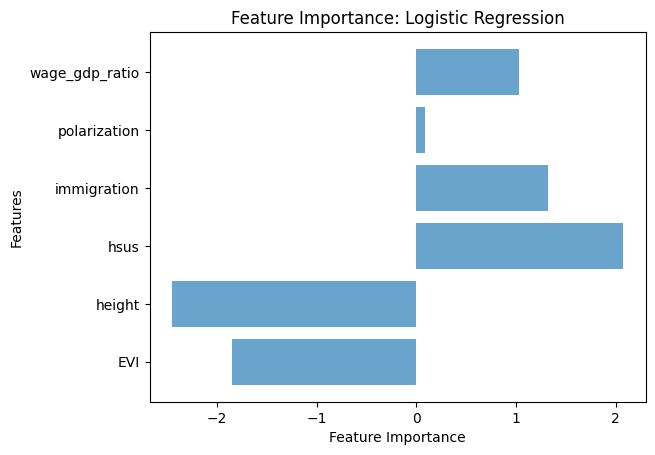

In [43]:
coefs = log_reg.params.reset_index()

plt.barh(coefs['index'], coefs[0], alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance: Logistic Regression')
plt.show()

Run it back with only statistically significant features at the 0.05 significance level to see if we can increase recall score

In [44]:
logit2_predictors = ['EVI', 'hsus', 'height']
logit_outcome = ['instability_class']

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(class_data[logit2_predictors],
                                                    class_data[logit_outcome],
                                                    test_size=0.3,
                                                    random_state=67)
# Create and fit the model
model = sm.Logit(y_train, X_train, random_state=67)
log_reg2 = model.fit()
print(log_reg2.summary())

# Collect probabilities of instability
logit2_probabilities = log_reg2.predict(X_test)


# Convert probabilities to binary values
logit2_predictions = (logit2_probabilities >= 0.5).astype(int)

# Calculare evaluation metrics
logit2_recall = recall_score(y_test, logit2_predictions)
print(f"Logistic Regression2 Recall: {logit_recall}")

logit2_precision = precision_score(y_test, logit2_predictions)
print(f"Logistic Regression2 Precision: {logit2_precision}")

logit2_f1 = f1_score(y_test, logit2_predictions)
print(f"Logistic Regression2 F1: {logit2_f1}")

Optimization terminated successfully.
         Current function value: 0.379792
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      instability_class   No. Observations:                  108
Model:                          Logit   Df Residuals:                      105
Method:                           MLE   Df Model:                            2
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.4515
Time:                        23:54:16   Log-Likelihood:                -41.018
converged:                       True   LL-Null:                       -74.786
Covariance Type:            nonrobust   LLR p-value:                 2.161e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EVI           -2.0674      0.507     -4.077      0.000      -3.061      -1.074
hsus           2.4798      0.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['random_state']
  warnings.warn(msg, ValueWarning)


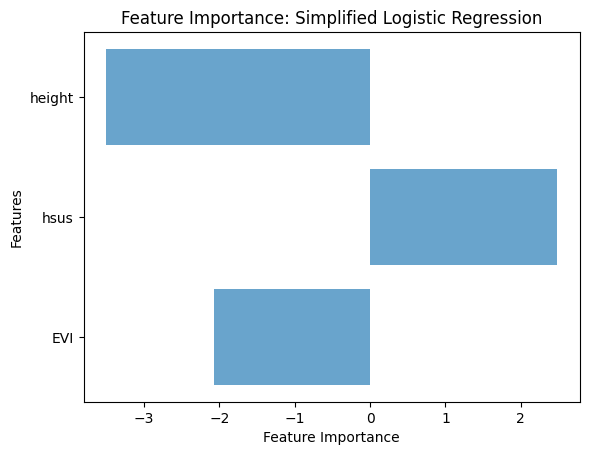

In [45]:
coefs = log_reg2.params.reset_index()

plt.barh(coefs['index'], coefs[0], alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance: Simplified Logistic Regression')
plt.show()

The simplified model has a better F1 score than the complex one, so we use the simplified model.

## Model 4: Decision Tree

Decision tree also allows us to analyze feature importance, so we fit the model with best parameters.

In [46]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0


Random Forest Recall: 0.9230769230769231
Random Forest F1: 0.9056603773584906


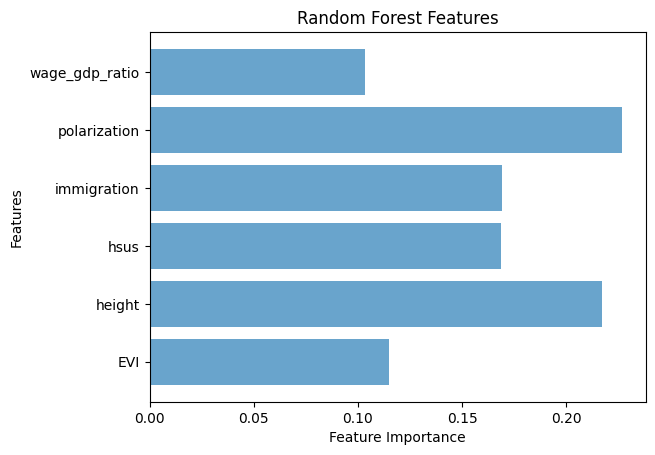

100
None


In [142]:
from sklearn.ensemble import RandomForestClassifier as rnd_frst
from sklearn.model_selection import RandomizedSearchCV

predictors = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']
outcome = ['instability_class']

X_train, X_test, y_train, y_test = train_test_split(class_data[predictors],
                                                    class_data[outcome],
                                                    test_size=0.3,
                                                    random_state=67)
# Create model instance
rf = rnd_frst(random_state=67)

# Create parameter grid to test
rf_parameter_grid = {'n_estimators': np.random.randint(50,500,4),
                     'max_depth': np.random.randint(1,20,5)}
# Create Random Search object
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=rf_parameter_grid,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create an instance of the best model
best_rf = rand_search.best_estimator_

# Generate predictions with the best model
y_hat = best_rf.predict(X_test)
y_train_hat = best_rf.predict(X_train)

# Calculate evaluation metrics
rf_recall = recall_score(y_test, y_hat)
print(f"Random Forest Recall: {rf_recall}")

rf_f1 = f1_score(y_test, y_hat)
print(f"Random Forest F1: {rf_f1}")

# Visualize feature importance
plt.barh(predictors, best_rf.feature_importances_, alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Features')
plt.show()

print(rf.n_estimators)
print(rf.max_depth)


Create another model that only deals with the top 4 feature importances

Random Forest Recall: 0.8846153846153846
Random Forest F1: 0.9199999999999999


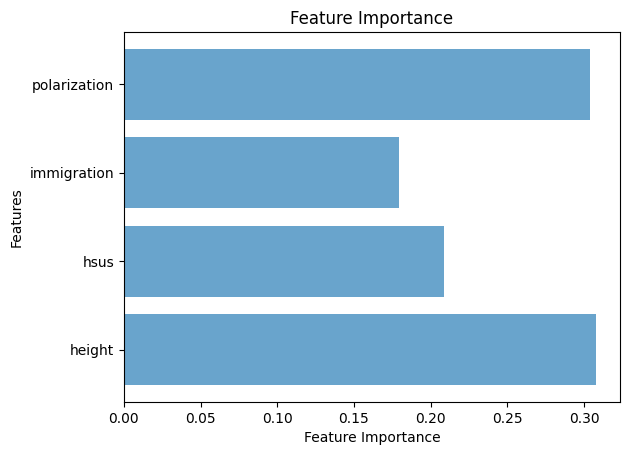

100
None


In [141]:
predictors = ['height', 'hsus', 'immigration', 'polarization']
outcome = ['instability_class']

X_train, X_test, y_train, y_test = train_test_split(class_data[predictors],
                                                    class_data[outcome],
                                                    test_size=0.3,
                                                    random_state=67)
# Create model instance
rf2 = rnd_frst(random_state=67)

# Create parameter grid to test
rf_parameter_grid = {'n_estimators': np.random.randint(50,500,4),
                     'max_depth': np.random.randint(1,20,5)}
# Create Random Search object
rand_search = RandomizedSearchCV(rf2,
                                 param_distributions=rf_parameter_grid,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create an instance of the best model
best_rf2 = rand_search.best_estimator_

# Generate predictions with the best model
y_hat = best_rf2.predict(X_test)
y_train_hat = best_rf2.predict(X_train)

# Calculate evaluation metrics
rf2_recall = recall_score(y_test, y_hat)
print(f"Random Forest Recall: {rf2_recall}")

rf2_f1 = f1_score(y_test, y_hat)
print(f"Random Forest F1: {rf2_f1}")

# Visualize feature importance
plt.barh(predictors, best_rf2.feature_importances_, alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest')
plt.show()

print(rf2.n_estimators)
print(rf2.max_depth)

Although more complex, the first random forest model performs better so we keep it.

The $R^2$ values for linear regression were lower (around 0.6) compared to the classification models with much higher F1 and recall scores. Recall scores are important because it is dangerous to falsely predict low political instability and be underprepared to deal with deaths per 1 million population.

From the classification models, the random forest performed better than both Logistic regression models in both recall and F1 score

# Question 4: Find the Best Dimensionality Reduction

## PCA

In [49]:
merged_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502


Create the PCA Data

In [50]:
from sklearn.decomposition import PCA

features = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']

# Create the PCA model
N = len(features)
model = PCA(n_components=N)
model.fit(merged_data[features])

# Create df of all PCA components
pcs_df = model.transform(merged_data[features])

# Add the first two PCA components to the merged_data and class_data df
merged_data['PC1'] = pcs_df[:,0]
merged_data['PC2'] = pcs_df[:,1]

class_data['PC1'] = pcs_df[:,0]
class_data['PC2'] = pcs_df[:,1]

In [51]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class,PC1,PC2
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0,2.694672,-0.933488
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0,3.233884,-0.981678
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0,3.128263,-0.654670
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0,3.264237,-0.373702
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0,3.580502,-0.210593


Apply the PCA data to the best regressor found previously (Random Forest with all features)

Random Forest Recall: 0.8846153846153846
Random Forest F1: 0.8846153846153846


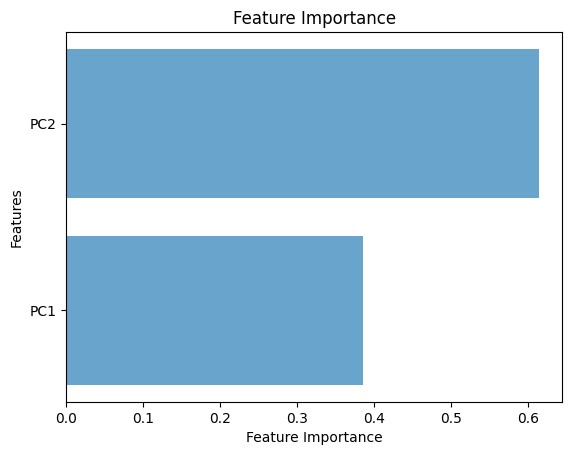

In [73]:
predictors = ['PC1', 'PC2']
outcome = ['instability_class']

X_train, X_test, y_train, y_test = train_test_split(class_data[predictors],
                                                    class_data[outcome],
                                                    test_size=0.3,
                                                    random_state=67)
# Create model instance
rf = rnd_frst(random_state=67)

# Create parameter grid to test
rf_parameter_grid = {'n_estimators': np.random.randint(50,500,4),
                     'max_depth': np.random.randint(1,20,5)}
# Create Random Search object
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=rf_parameter_grid,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create an instance of the best model
best_rf_PCA = rand_search.best_estimator_

# Generate predictions with the best model
y_hat = best_rf_PCA.predict(X_test)
y_train_hat = best_rf_PCA.predict(X_train)

# Calculate evaluation metrics
rf_PCA_recall = recall_score(y_test, y_hat)
print(f"Random Forest Recall: {rf_PCA_recall}")

rf_PCA_f1 = f1_score(y_test, y_hat)
print(f"Random Forest F1: {rf_PCA_f1}")

# Visualize feature importance
plt.barh(predictors, best_rf_PCA.feature_importances_, alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## t-SNE

In [53]:
from sklearn.manifold import TSNE

features = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']

# Create the model instance
model = TSNE(n_components=2, random_state=42)

# Transform the data
X_tsne = model.fit_transform(merged_data[features]).T

# Add the t-SNE components to the merged_data df
class_data['tSNE1'] = X_tsne[0]
class_data['tSNE2'] = X_tsne[1]

In [54]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class,PC1,PC2,tSNE1,tSNE2
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0,2.694672,-0.933488,-2.572935,-8.830811
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0,3.233884,-0.981678,-3.088157,-9.179615
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0,3.128263,-0.654670,-3.358337,-8.578605
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0,3.264237,-0.373702,-3.940221,-8.171413
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0,3.580502,-0.210593,-4.547345,-8.025416


Text(0, 0.5, 'KL divergence')

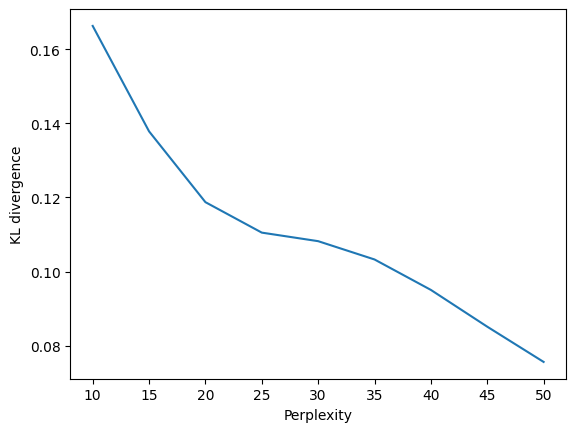

In [55]:
new_features = ['tSNE1', 'tSNE2']

perplexity = np.arange(10, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init='random', perplexity=i)
    model.fit_transform(class_data[new_features])
    divergence.append(model.kl_divergence_)
fig = sns.lineplot(x=perplexity, y=divergence)
plt.xlabel('Perplexity')
plt.ylabel('KL divergence')

Choose perplexity=50 for hyperparameter

In [56]:
from re import X
new_features = ['tSNE1', 'tSNE2']
features = ['EVI', 'height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']

# Create parameters to test t-SNE
learning_rate = np.arange(10, 100, 10)

# Create parameter grid to test each combination of t-SNE parameters
# for Random Forest
rf_parameter_grid = {'n_estimators': np.random.randint(50,500,4),
                     'max_depth': np.random.randint(1,20,5)}

best_recall = 0
best_lr = 0

best_rf_params = None
for lr in learning_rate:

  loop_data = class_data.copy()
  model = TSNE(n_components=2, init='random', perplexity=i, random_state=42,
                    learning_rate=lr)
  X_tsne = model.fit_transform(loop_data[features]).T
  loop_data['tSNE1'] = X_tsne[0]
  loop_data['tSNE2'] = X_tsne[1]

  X_train, X_test, y_train, y_test = train_test_split(loop_data[new_features],
                                                      loop_data['instability_class'],
                                                      test_size=0.3,
                                                      random_state=67)

  # Create Random Search object
  rand_search = RandomizedSearchCV(rf,
                                   param_distributions=rf_parameter_grid,
                                   n_iter=10,
                                   cv=5)

  # Fit the random search object to the data
  rand_search.fit(X_train, y_train)

  # Create an instance of the best model
  best_rf_PCA = rand_search.best_estimator_

  # Generate predictions with the best model
  y_hat = best_rf_PCA.predict(X_test)
  y_train_hat = best_rf_PCA.predict(X_train)

  # Calculate evaluation metrics and update best parameters for t-SNE
  rf_PCA_recall = recall_score(y_test, y_hat)
  rf_PCA_f1 = f1_score(y_test, y_hat)
  print(f"Perplexity: {i}, Learning Rate: {lr}, Recall: {rf_PCA_recall}, F1: {rf_PCA_f1}")

  if rf_PCA_recall > best_recall:
    best_recall = rf_PCA_recall
    best_lr = lr
    best_perplexity = i
    best_rf_params = best_rf_PCA.get_params()

print(f"Best Recall: {best_recall}")
print(f"Best Learning Rate: {best_lr}")
print(f"Best Perplexity: {best_perplexity}")
print(f"Best Random Forest Parameters: {best_rf_params}")




Perplexity: 50, Learning Rate: 10, Recall: 0.8461538461538461, F1: 0.8799999999999999
Perplexity: 50, Learning Rate: 20, Recall: 0.8846153846153846, F1: 0.8679245283018868
Perplexity: 50, Learning Rate: 30, Recall: 0.9230769230769231, F1: 0.9230769230769231
Perplexity: 50, Learning Rate: 40, Recall: 0.8846153846153846, F1: 0.8679245283018868
Perplexity: 50, Learning Rate: 50, Recall: 0.9615384615384616, F1: 0.9090909090909091
Perplexity: 50, Learning Rate: 60, Recall: 0.9615384615384616, F1: 0.8928571428571429
Perplexity: 50, Learning Rate: 70, Recall: 0.9615384615384616, F1: 0.9090909090909091
Perplexity: 50, Learning Rate: 80, Recall: 0.9615384615384616, F1: 0.9433962264150944
Perplexity: 50, Learning Rate: 90, Recall: 0.9615384615384616, F1: 0.9433962264150944
Best Recall: 0.9615384615384616
Best Learning Rate: 50
Best Perplexity: 50
Best Random Forest Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt',

Test the model with a new random seed to see if strong results persist.

In [57]:


for rs in range(10):

  loop_data = class_data.copy()
  model = TSNE(n_components=2, init='random', perplexity=50, random_state=42,
                    learning_rate=40)
  X_tsne = model.fit_transform(loop_data[features]).T
  loop_data['tSNE1'] = X_tsne[0]
  loop_data['tSNE2'] = X_tsne[1]

  X_train, X_test, y_train, y_test = train_test_split(loop_data[new_features],
                                                      loop_data['instability_class'],
                                                      test_size=0.3)

  # Create an instance of the best model from the parameters we found
  best_rf_SNA = rnd_frst(n_estimators=best_rf_params['n_estimators'],
                         max_depth=best_rf_params['max_depth'],
                         random_state=rs)

  # Fit the best model
  best_rf_PCA.fit(X_train, y_train)

  # Generate predictions with the best model
  y_hat = best_rf_SNE.predict(X_test)
  y_train_hat = best_rf_PCA.predict(X_train)

  # Calculate evaluation metrics and update best parameters for t-SNE
  rf_SNE_recall = recall_score(y_test, y_hat)
  rf_SNE_f1 = f1_score(y_test, y_hat)
  print(f"Perplexity: {i}, Learning Rate: {lr}, Recall: {rf_SNE_recall}, F1: {rf_SNE_f1}")



Perplexity: 50, Learning Rate: 90, Recall: 0.9259259259259259, F1: 0.9433962264150944
Perplexity: 50, Learning Rate: 90, Recall: 0.9615384615384616, F1: 0.9433962264150944
Perplexity: 50, Learning Rate: 90, Recall: 0.8947368421052632, F1: 0.7727272727272727
Perplexity: 50, Learning Rate: 90, Recall: 0.9565217391304348, F1: 0.8979591836734695
Perplexity: 50, Learning Rate: 90, Recall: 0.8518518518518519, F1: 0.8846153846153846
Perplexity: 50, Learning Rate: 90, Recall: 0.9, F1: 0.8571428571428572
Perplexity: 50, Learning Rate: 90, Recall: 0.95, F1: 0.8837209302325583
Perplexity: 50, Learning Rate: 90, Recall: 0.95, F1: 0.8444444444444444
Perplexity: 50, Learning Rate: 90, Recall: 0.8148148148148148, F1: 0.830188679245283
Perplexity: 50, Learning Rate: 90, Recall: 1.0, F1: 0.9642857142857143


Strong results persist. Fit the model again with another random state for reporting

t-SNE Recall: 0.95
t-SNE F1: 0.8444444444444444


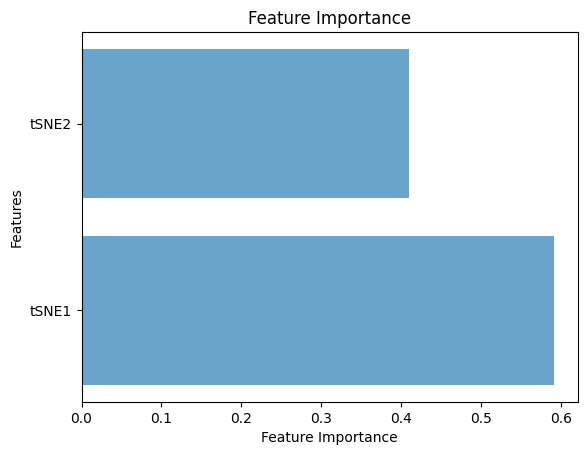

In [74]:
new_features = ['tSNE1', 'tSNE2']

# Create t-SNE data and add it to the class data
model = TSNE(n_components=2, init='random', perplexity=50, random_state=42,
              learning_rate=90)
X_tsne = model.fit_transform(loop_data[features]).T
class_data['tSNE1'] = X_tsne[0]
class_data['tSNE2'] = X_tsne[1]

# Train ...
X_train, X_test, y_train, y_test = train_test_split(class_data[new_features],
                                                    class_data['instability_class'],
                                                    test_size=0.3,
                                                    random_state=42)

# Create an instance of the best model from the parameters we found
best_rf_SNE = rnd_frst(n_estimators=best_rf_params['n_estimators'],
                        max_depth=best_rf_params['max_depth'],
                        random_state=rs)

# Fit the best model
best_rf_SNE.fit(X_train, y_train)

# Generate predictions with the best model
y_hat = best_rf_SNE.predict(X_test)
y_train_hat = best_rf_SNE.predict(X_train)

# Calculate evaluation metrics and update best parameters for t-SNE
rf_SNE_recall = recall_score(y_test, y_hat)
rf_SNE_f1 = f1_score(y_test, y_hat)
print(f"t-SNE Recall: {rf_SNE_recall}")
print(f"t-SNE F1: {rf_SNE_f1}")

# Visualize feature importance
plt.barh(new_features, best_rf_SNE.feature_importances_, alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## Autoencoder

In [60]:
import torch
from torch import optim

In [61]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class,PC1,PC2,tSNE1,tSNE2
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0,2.694672,-0.933488,-0.599193,-0.659899
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0,3.233884,-0.981678,-0.910544,-0.284357
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0,3.128263,-0.654670,-0.514117,-0.127927
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0,3.264237,-0.373702,-0.184340,0.301902
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0,3.580502,-0.210593,-0.318882,0.623461


In [62]:
dft = torch.tensor(class_data[['EVI','height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']].dropna().values, dtype=torch.float64, requires_grad=True)
dft_outcome = torch.tensor(class_data[['instability_class']].dropna().values, dtype=torch.float64, requires_grad=True)
class_data_tensor = torch.tensor(class_data[['EVI','height', 'hsus', 'immigration', 'polarization', 'wage_gdp_ratio']].values, dtype=torch.float32, requires_grad=True)

Create the Linear Autoencoder Class

In [63]:
class AE(torch.nn.Module): # Inherit from the parent class
    def __init__(self):
        super().__init__() # Parent class constructor (`super` calls
                           # inherited methods and attributes)

        # Encoder method:
        # Building an linear encoder with Linear
        # layer followed by Relu activation function.
        #
        # Returns output of last layer
        self.encoder = torch.nn.Sequential(
             torch.nn.Linear(6, 16),
             torch.nn.ReLU(inplace=True), # inplace=True!
             torch.nn.Linear(16, 8),
             torch.nn.ReLU(inplace=True),
             torch.nn.Linear(8, 4),
             torch.nn.ReLU(inplace=True),
             torch.nn.Linear(4, 2) #started with 6, down to 2 features
             )

        # Decoder method:
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The final Tanh() activation function
        # outputs the value between 0 and 1.
        #
        # Returns output of last layer
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2, 4),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(4, 8),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(8, 16),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(16, 6),
            torch.nn.Tanh() # bounded
            )

    # The forward pass function.
    # Pytorch.nn models build and save the information required
    # for backward passes during training in a format that can
    # be used by pytorch.nn loss functions.
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [64]:
# Assign values to hyperparameters
num_epochs = 100
batch_size = 20 # speeds things up
learning_rate = 1e-2

# Create a model instance
model = AE()


# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an AdamW Optimizer with learning rate = lr
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

1.100487470626831


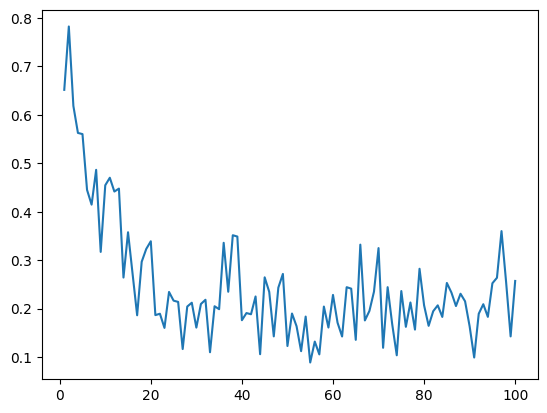

In [65]:
from torch.utils.data import DataLoader


# Create a data loader
dataloader = DataLoader(class_data_tensor, batch_size=batch_size, shuffle=True)

losses = []
# Train the model
first = True
for epoch in range(num_epochs):
    for batch in dataloader:
        years = batch.float()

        # The original has 128 recipes and 679 features
        # The reduced has 128 recipes and 679 features
        # The number of recipes is out batch size
        # The number of features is determined by the layers in the constructor
        # defined by the dimensions of our tensor data frame
        original, reduced = model(years)


        # Calculate the loss
        loss = loss_function(reduced, years)

        loss.backward()       # calculate the gradient
        optimizer.step()      # update weights
        optimizer.zero_grad() # zero the gradients

        loss = loss.item()

        if first == True:
            print(loss)
            first = False
    losses.append(loss)

plt.plot(range(1, num_epochs + 1), losses)

In [66]:
class_data['auto1'] = model.encoder(class_data_tensor)[:, 0].detach()
class_data['auto2'] = model.encoder(class_data_tensor)[:, 1].detach()

In [67]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class,PC1,PC2,tSNE1,tSNE2,auto1,auto2
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0,2.694672,-0.933488,-0.599193,-0.659899,-26.061125,27.530369
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0,3.233884,-0.981678,-0.910544,-0.284357,-31.345583,33.107658
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0,3.128263,-0.654670,-0.514117,-0.127927,-27.917921,29.457104
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0,3.264237,-0.373702,-0.184340,0.301902,-27.037888,28.496662
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0,3.580502,-0.210593,-0.318882,0.623461,-28.677736,30.205530


Fit a random forest 3 times, each with these new transformed variables and compare f1 and recall score.

Random Forest Recall: 0.8846153846153846
Random Forest F1: 0.8518518518518519


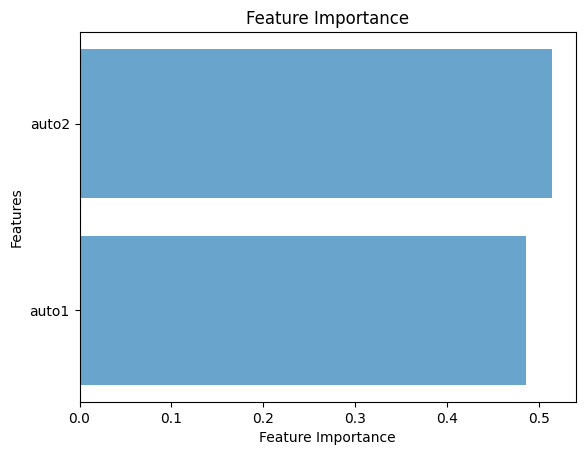

In [72]:
from sklearn.model_selection import train_test_split


predictors = ['auto1', 'auto2']
outcome = ['instability_class']

X_train, X_test, y_train, y_test = train_test_split(class_data[predictors],
                                                    class_data[outcome],
                                                    test_size=0.3,
                                                    random_state=67)
# Create model instance
rf = rnd_frst(random_state=67)

# Create parameter grid to test
rf_parameter_grid = {'n_estimators': np.random.randint(50,500,4),
                     'max_depth': np.random.randint(1,20,5)}
# Create Random Search object
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=rf_parameter_grid,
                                 n_iter=10,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create an instance of the best model
best_rf_auto = rand_search.best_estimator_

# Generate predictions with the best model
y_hat = best_rf_auto.predict(X_test)
y_train_hat = best_rf_auto.predict(X_train)

# Calculate evaluation metrics
rf_auto_recall = recall_score(y_test, y_hat)
print(f"Random Forest Recall: {rf_auto_recall}")

rf_auto_f1 = f1_score(y_test, y_hat)
print(f"Random Forest F1: {rf_auto_f1}")

# Visualize feature importance
plt.barh(predictors, best_rf_auto.feature_importances_, alpha=0.67)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

The best dimensionality reduction was t-SNE with Recall 0.95 and F1 0.844. The random forest without reduction has metrics Recall 0.923 and F1 0.9056. There is better recall so we stick to the t-SNE; it calptures non-linear relationships in the data

# Question 5: Dimensionality Reduction for Unsupervised Classification

Use the same df as the last question. Fit a KMeans model to test the different ones

## PCA

In [87]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class,PC1,PC2,tSNE1,tSNE2,auto1,auto2
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0,2.694672,-0.933488,-0.599193,-0.659899,-26.061125,27.530369
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0,3.233884,-0.981678,-0.910544,-0.284357,-31.345583,33.107658
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0,3.128263,-0.654670,-0.514117,-0.127927,-27.917921,29.457104
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0,3.264237,-0.373702,-0.184340,0.301902,-27.037888,28.496662
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0,3.580502,-0.210593,-0.318882,0.623461,-28.677736,30.205530


Automatically found elbow at 4 clusters.


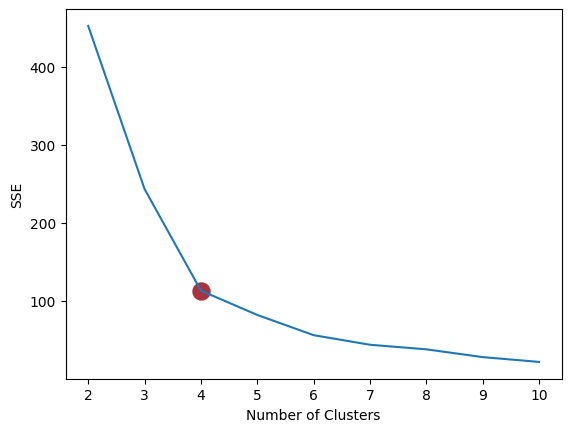

Text(0, 0.5, 'Silhouette Score')

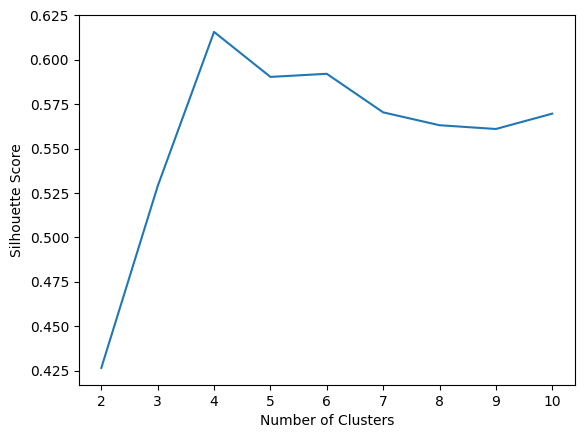

In [96]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

features = ['PC1', 'PC2']
kmeans_kwargs = {'init': 'random', 'n_init': 10,
                 'max_iter': 300}

k_vals = list(range(2, 11))
pca_sse = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(class_data[features])
    pca_sse.append(kmeans.inertia_)

kl = KneeLocator(k_vals, pca_sse, curve='convex',
                 direction='decreasing')
print('Automatically found elbow at %d clusters.'%kl.elbow)

plt.plot(k_vals, pca_sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.scatter(kl.elbow, kl.elbow_y, s=150, c='#a8323e')
plt.show()


pca_silhouette_coefficients = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(class_data[features])
    score = silhouette_score(class_data[features], kmeans.labels_)
    pca_silhouette_coefficients.append(score)

plt.plot(k_vals, pca_silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')



## t-SNE

Automatically found elbow at 4 clusters.


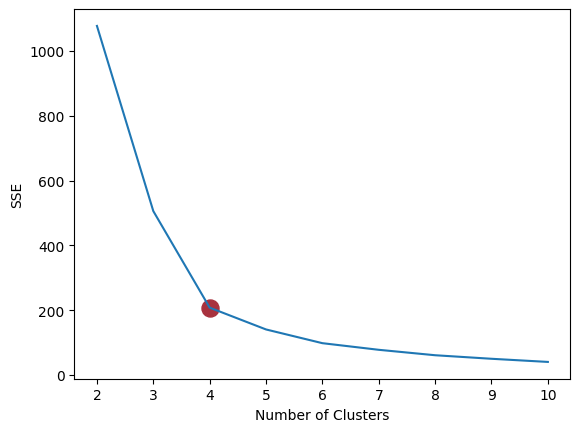

In [101]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

features = ['tSNE1', 'tSNE2']
kmeans_kwargs = {'init': 'random', 'n_init': 10,
                 'max_iter': 300}

k_vals = list(range(2, 11))
sne_sse = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(class_data[features])
    sne_sse.append(kmeans.inertia_)

kl = KneeLocator(k_vals, sse, curve='convex',
                 direction='decreasing')
print('Automatically found elbow at %d clusters.'%kl.elbow)

plt.plot(k_vals, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.scatter(kl.elbow, kl.elbow_y, s=150, c='#a8323e');

In [83]:
class_data.head()

,Year,instability,EVI,height,hsus,immigration,polarization,wage_gdp_ratio,instability_class,PC1,PC2,tSNE1,tSNE2,auto1,auto2
33,1815,-1.979605,-0.963633,-0.041846,-1.298321,-1.831145,0.162116,2.189217,0,2.694672,-0.933488,-0.599193,-0.659899,-26.061125,27.530369
34,1816,-1.979605,-0.963115,-0.044752,-1.286859,-1.828660,-0.193555,2.982263,0,3.233884,-0.981678,-0.910544,-0.284357,-31.345583,33.107658
35,1817,-1.979605,-0.962320,-0.047658,-1.281753,-1.825244,-0.786767,2.197835,0,3.128263,-0.654670,-0.514117,-0.127927,-27.917921,29.457104
36,1818,-1.979605,-0.961284,-0.051884,-1.268867,-1.822449,-1.484629,1.821607,0,3.264237,-0.373702,-0.184340,0.301902,-27.037888,28.496662
37,1819,-1.979605,-0.960349,-0.050564,-1.257391,-1.819033,-2.084064,1.914502,0,3.580502,-0.210593,-0.318882,0.623461,-28.677736,30.205530


Text(0, 0.5, 'Silhouette Score')

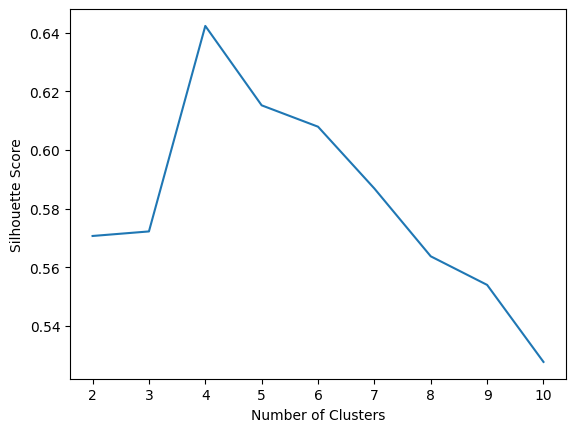

In [94]:
sne_silhouette_coefficients = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(class_data[features])
    score = silhouette_score(class_data[features], kmeans.labels_)
    sne_silhouette_coefficients.append(score)

plt.plot(k_vals, sne_silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

4 clusters is optimal according to SSE and Silhouette score. Fit a kmeans model with 4 clusters

## Autoencoder

Automatically found elbow at 4 clusters.


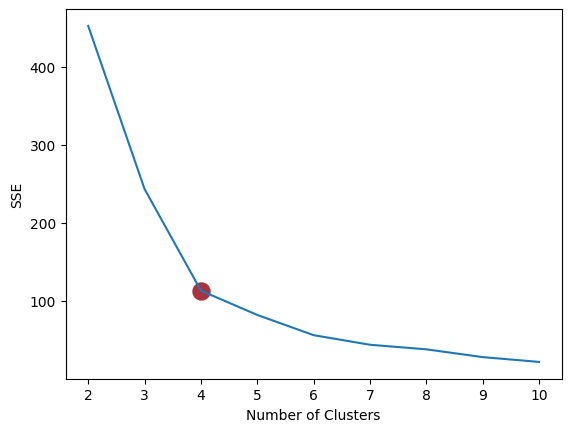

Text(0, 0.5, 'Silhouette Score')

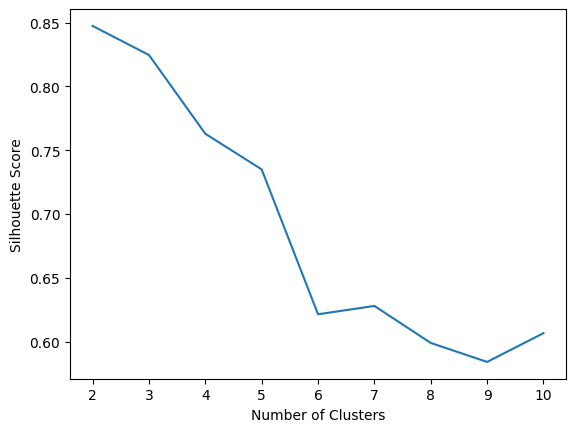

In [98]:
features = ['auto1', 'auto2']
kmeans_kwargs = {'init': 'random', 'n_init': 10,
                 'max_iter': 300}

k_vals = list(range(2, 11))
auto_sse = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(class_data[features])
    auto_sse.append(kmeans.inertia_)

kl = KneeLocator(k_vals, pca_sse, curve='convex',
                 direction='decreasing')
print('Automatically found elbow at %d clusters.'%kl.elbow)

plt.plot(k_vals, pca_sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.scatter(kl.elbow, kl.elbow_y, s=150, c='#a8323e')
plt.show()


auto_silhouette_coefficients = []
for k in k_vals:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(class_data[features])
    score = silhouette_score(class_data[features], kmeans.labels_)
    auto_silhouette_coefficients.append(score)

plt.plot(k_vals, auto_silhouette_coefficients)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

## Summary

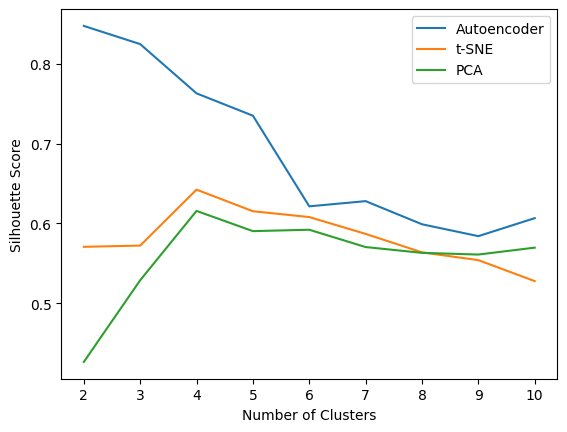

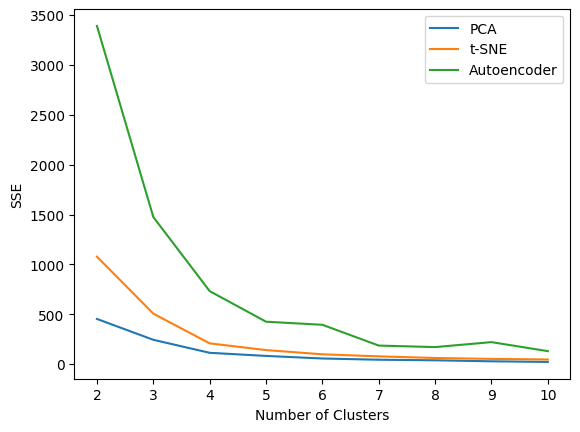

In [102]:
plt.plot(k_vals, auto_silhouette_coefficients, label="Autoencoder")
plt.plot(k_vals, sne_silhouette_coefficients, label="t-SNE")
plt.plot(k_vals, pca_silhouette_coefficients, label="PCA")
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.plot(k_vals, pca_sse, label="PCA")
plt.plot(k_vals, sne_sse, label="t-SNE")
plt.plot(k_vals, auto_sse, label="Autoencoder")
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Autoencoder has better silhouette score for 4 clusters.

# Question 6: Explore Clusters of Variability

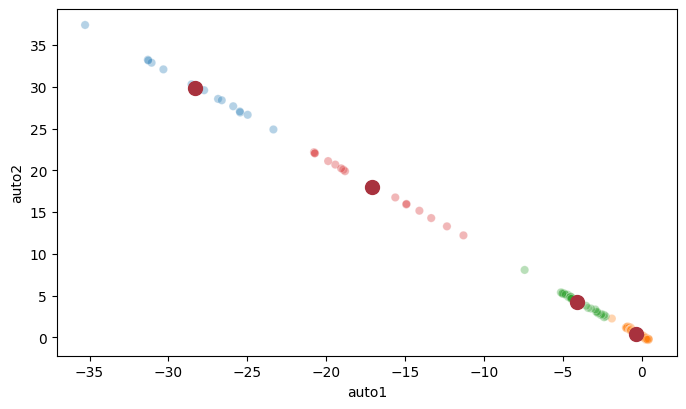

In [144]:
features = ['auto1', 'auto2']
n_clusters = 4
kmeans = KMeans(init='random', n_clusters=n_clusters,
                n_init=10, max_iter=300)
kmeans.fit(class_data[['auto1', 'auto2']])

fig, ax = plt.subplots(figsize=(8, 4.5))
# Plot and add jitter for better visualization
ax = sns.scatterplot(ax=ax,
                x=class_data[features[0]]+np.random.rand(len(class_data))*0.2,
                y=class_data[features[1]]+np.random.rand(len(class_data))*0.2,
                hue=kmeans.labels_,
                palette=sns.color_palette('tab10',
                                          n_colors=n_clusters),
                legend=None, alpha = 0.33)

for n, [dur, qual] in enumerate(kmeans.cluster_centers_):
    ax.scatter(dur, qual, s=100, c='#a8323e')

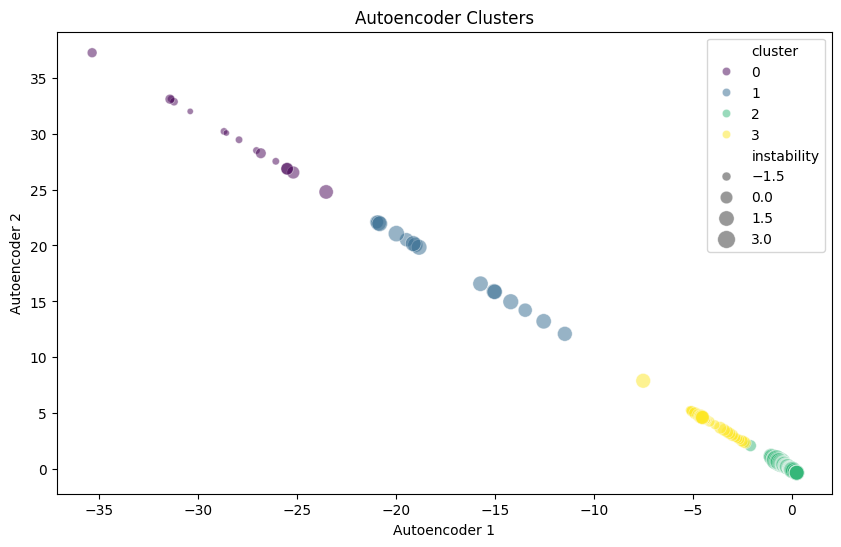

In [165]:
import seaborn as sns

clusters = kmeans.fit_predict(class_data[['auto1', 'auto2']])
class_data['cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='auto1', y='auto2',
                hue='cluster',
                size='instability',
                sizes = (20, 200),
                data=class_data,
                palette='viridis',
                alpha=0.5
                )
plt.ylabel('Autoencoder 2')
plt.xlabel('Autoencoder 1')
plt.title('Autoencoder Clusters')
plt.show()


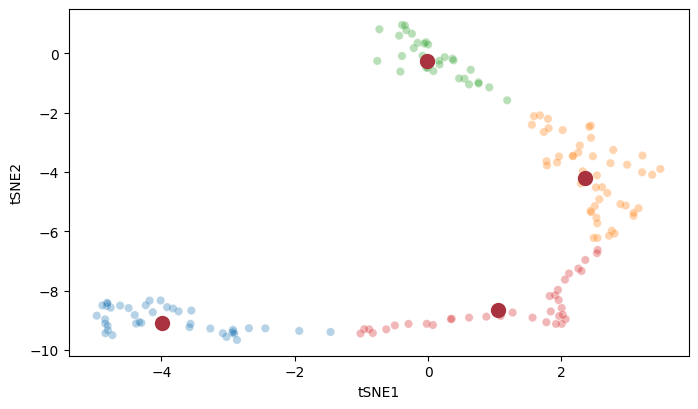

In [108]:
features = ['tSNE1', 'tSNE2']
n_clusters = 4
kmeans = KMeans(init='random', n_clusters=n_clusters,
                n_init=10, max_iter=300)
kmeans.fit(class_data[['tSNE1', 'tSNE2']])

fig, ax = plt.subplots(figsize=(8, 4.5))
# Plot and add jitter for better visualization
ax = sns.scatterplot(ax=ax,
                x=class_data[features[0]]+np.random.rand(len(class_data))*0.2,
                y=class_data[features[1]]+np.random.rand(len(class_data))*0.2,
                hue=kmeans.labels_,
                palette=sns.color_palette('tab10',
                                          n_colors=n_clusters),
                legend=None, alpha = 0.33)

for n, [dur, qual] in enumerate(kmeans.cluster_centers_):
    ax.scatter(dur, qual, s=100, c='#a8323e')

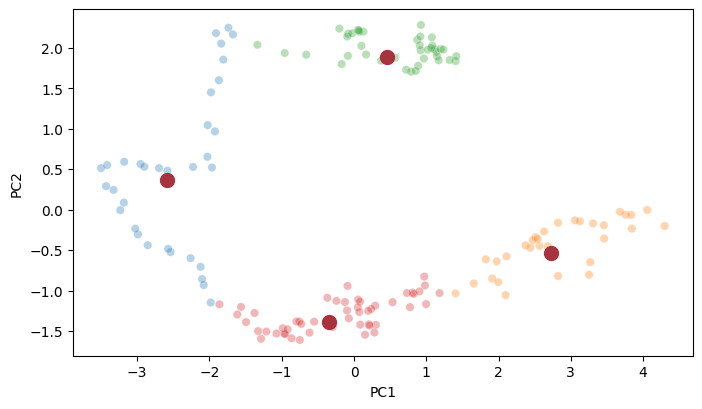

In [109]:
features = ['PC1', 'PC2']
n_clusters = 4
kmeans = KMeans(init='random', n_clusters=n_clusters,
                n_init=10, max_iter=300)
kmeans.fit(class_data[['PC1', 'PC2']])

fig, ax = plt.subplots(figsize=(8, 4.5))
# Plot and add jitter for better visualization
ax = sns.scatterplot(ax=ax,
                x=class_data[features[0]]+np.random.rand(len(class_data))*0.2,
                y=class_data[features[1]]+np.random.rand(len(class_data))*0.2,
                hue=kmeans.labels_,
                palette=sns.color_palette('tab10',
                                          n_colors=n_clusters),
                legend=None, alpha = 0.33)

for n, [dur, qual] in enumerate(kmeans.cluster_centers_):
    ax.scatter(dur, qual, s=100, c='#a8323e')

In [143]:

plt.show()

ValueError: Could not interpret value `cluster` for `hue`. An entry with this name does not appear in `data`.